In [1]:
import pandas as pd

file_path = "../data/raw/filtered.tsv"
df = pd.read_csv(file_path, delimiter="\t")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577777 entries, 0 to 577776
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   577777 non-null  int64  
 1   reference    577777 non-null  object 
 2   translation  577777 non-null  object 
 3   similarity   577777 non-null  float64
 4   lenght_diff  577777 non-null  float64
 5   ref_tox      577777 non-null  float64
 6   trn_tox      577777 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 30.9+ MB
None


In [3]:
print(df.describe())
print(df.isnull().sum())

          Unnamed: 0     similarity    lenght_diff        ref_tox  \
count  577777.000000  577777.000000  577777.000000  577777.000000   
mean   288888.000000       0.758469       0.157652       0.541372   
std    166789.997578       0.092695       0.108057       0.457571   
min         0.000000       0.600001       0.000000       0.000033   
25%    144444.000000       0.681105       0.066667       0.012171   
50%    288888.000000       0.754439       0.141791       0.806795   
75%    433332.000000       0.831244       0.238095       0.990469   
max    577776.000000       0.950000       0.400000       0.999724   

             trn_tox  
count  577777.000000  
mean        0.434490  
std         0.458904  
min         0.000033  
25%         0.000707  
50%         0.085133  
75%         0.973739  
max         0.999730  
Unnamed: 0     0
reference      0
translation    0
similarity     0
lenght_diff    0
ref_tox        0
trn_tox        0
dtype: int64


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


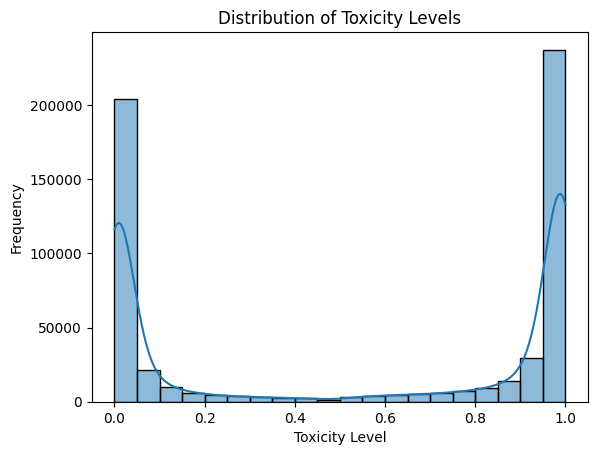

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['ref_tox'], bins=20, kde=True)
plt.title("Distribution of Toxicity Levels")
plt.xlabel("Toxicity Level")
plt.ylabel("Frequency")
plt.show()

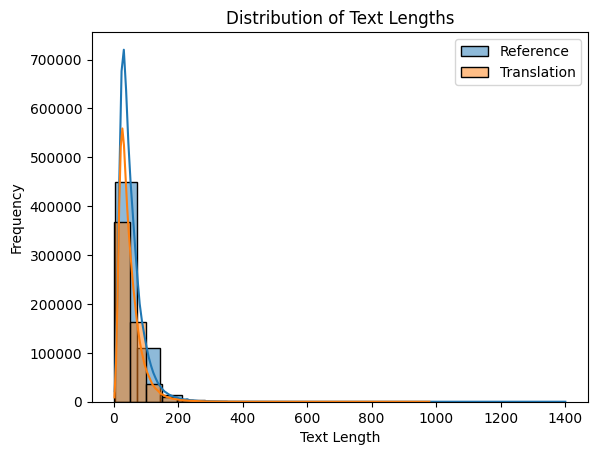

In [5]:
df['ref_length'] = df['reference'].apply(len)
df['trn_length'] = df['translation'].apply(len)

sns.histplot(df['ref_length'], bins=20, kde=True, label='Reference')
sns.histplot(df['trn_length'], bins=20, kde=True, label='Translation')
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [6]:
print("Examples of Toxic Texts:")
print(df[df['ref_tox'] > 0.5]['reference'].head(5).values)

print("\nExamples of Non-Toxic Texts:")
print(df[df['ref_tox'] < 0.5]['reference'].head(5).values)


Examples of Toxic Texts:
["I'm not gonna have a child... ...with the same genetic disorder as me who's gonna die. L..."
 "They're all laughing at us, so we'll kick your ass."
 'Maine was very short on black people back then.'
 'So now their spirits are cursed, walking back roads, waterways, and if they find an unfaithful man, they kill him, and that man is never seen again.'
 'Come on, Cal, leave that shit alone.']

Examples of Non-Toxic Texts:
['If Alkar is flooding her with psychic waste, that explains the high level of neurotransmitters.'
 "Now you're getting nasty." 'Well, we could spare your life, for one.'
 "Ah! Monkey, you've got to snap out of it."
 "I've got orders to put her down."]


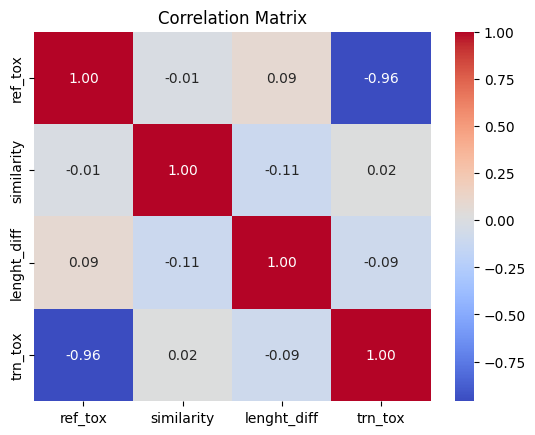

In [7]:
correlation_matrix = df[['ref_tox', 'similarity', 'lenght_diff', 'trn_tox']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


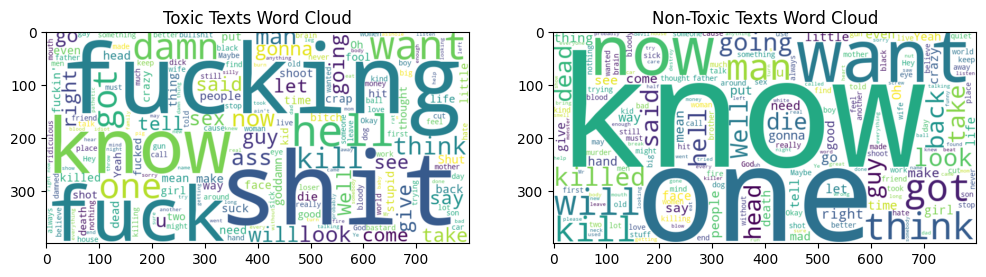

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_toxic_text = ' '.join(df[df['ref_tox'] > 0.5]['reference'])
all_non_toxic_text = ' '.join(df[df['ref_tox'] <= 0.5]['reference'])

toxic_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_toxic_text)
non_toxic_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_non_toxic_text)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(toxic_wordcloud, interpolation='bilinear')
plt.title('Toxic Texts Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(non_toxic_wordcloud, interpolation='bilinear')
plt.title('Non-Toxic Texts Word Cloud')

plt.show()


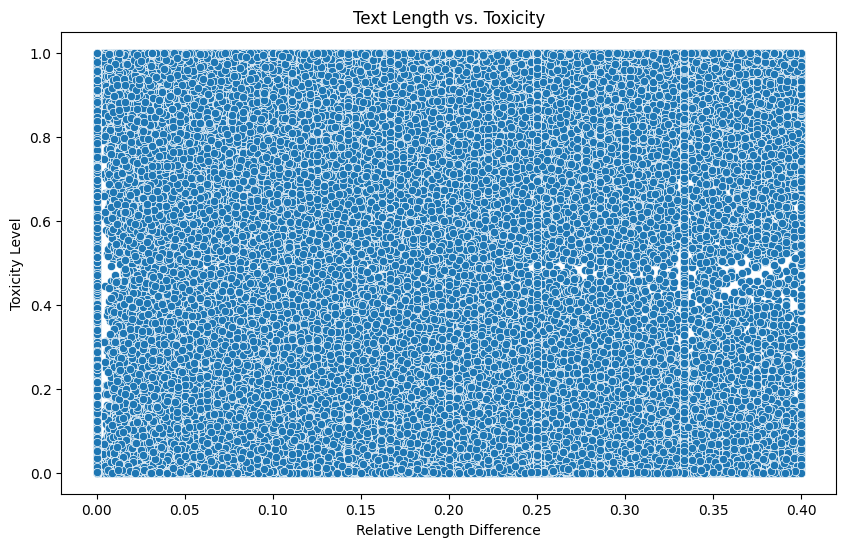

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='lenght_diff', y='ref_tox', data=df)
plt.title('Text Length vs. Toxicity')
plt.xlabel('Relative Length Difference')
plt.ylabel('Toxicity Level')
plt.show()


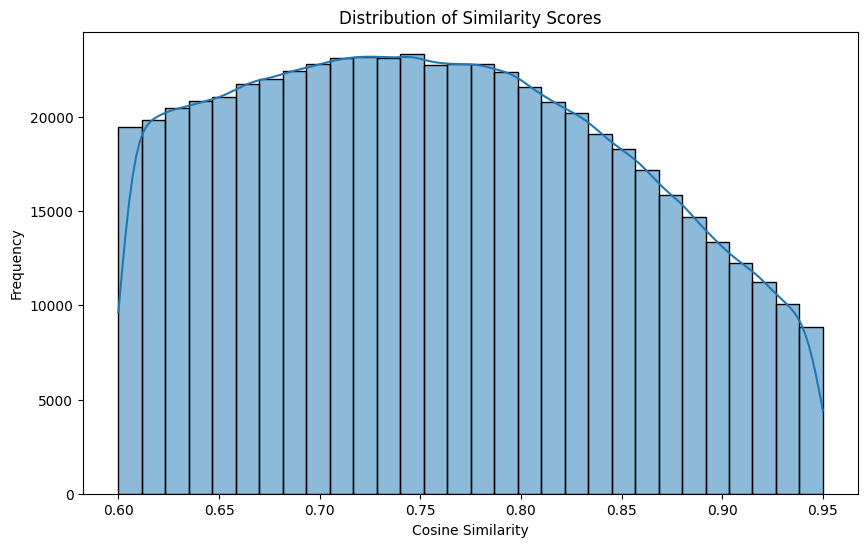

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['similarity'], bins=30, kde=True)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()